In [1]:
#| echo: false
#| warning: false
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdc = pd.read_csv("../../data/01-modified-data/cdc_clean.csv")
cdc.drop('Unnamed: 0', axis = 1, inplace= True)
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   group                   9977 non-null   object 
 1   state                   9977 non-null   object 
 2   subgroup                9977 non-null   object 
 3   phase                   9977 non-null   float64
 4   time_period             9977 non-null   int64  
 5   time_period_start_date  9977 non-null   object 
 6   time_period_end_date    9977 non-null   object 
 7   value                   9977 non-null   float64
 8   lowci                   9977 non-null   float64
 9   highci                  9977 non-null   float64
 10  key                     9977 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 857.5+ KB


In [3]:
cdc.head()

,group,state,subgroup,phase,time_period,time_period_start_date,time_period_end_date,value,lowci,highci,key
0,National Estimate,United States,United States,3.5,46,2022-06-01,2022-06-13,14.0,13.5,14.5,1
1,Age,United States,18 - 29 years,3.5,46,2022-06-01,2022-06-13,17.8,15.9,19.8,1
2,Age,United States,30 - 39 years,3.5,46,2022-06-01,2022-06-13,15.2,14.1,16.2,1
3,Age,United States,40 - 49 years,3.5,46,2022-06-01,2022-06-13,16.9,15.7,18.3,1
4,Age,United States,50 - 59 years,3.5,46,2022-06-01,2022-06-13,15.3,14.1,16.7,1


Thus far, we can see some of the important columns to take a further look at are `group`, `subgroup`, `value`, and `key`. Firstly, let's look at the distribution of the value (percent having Long Covid based on the key's defintion) grouped by each key. 

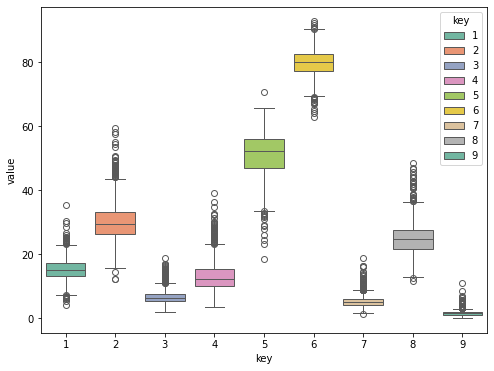

In [4]:
# cdc['key'] = cdc['key'].astype('category')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="key", y="value",
            hue="key", palette="Set2",
            data=cdc)
plt.show()

From the boxplots, we can see that the distibution across keys is varying, with the highest percentage going to key 6, representing the percentage of adults with any activity limitations from long Covid who also currently have long Covid. The lowest range of values goes to key 9, which represents the percentage of adults of significant activity limitations. 

Thus, to understand this data further, we'll take a look at the additional groups affected by Long Covid in a number of ways. 

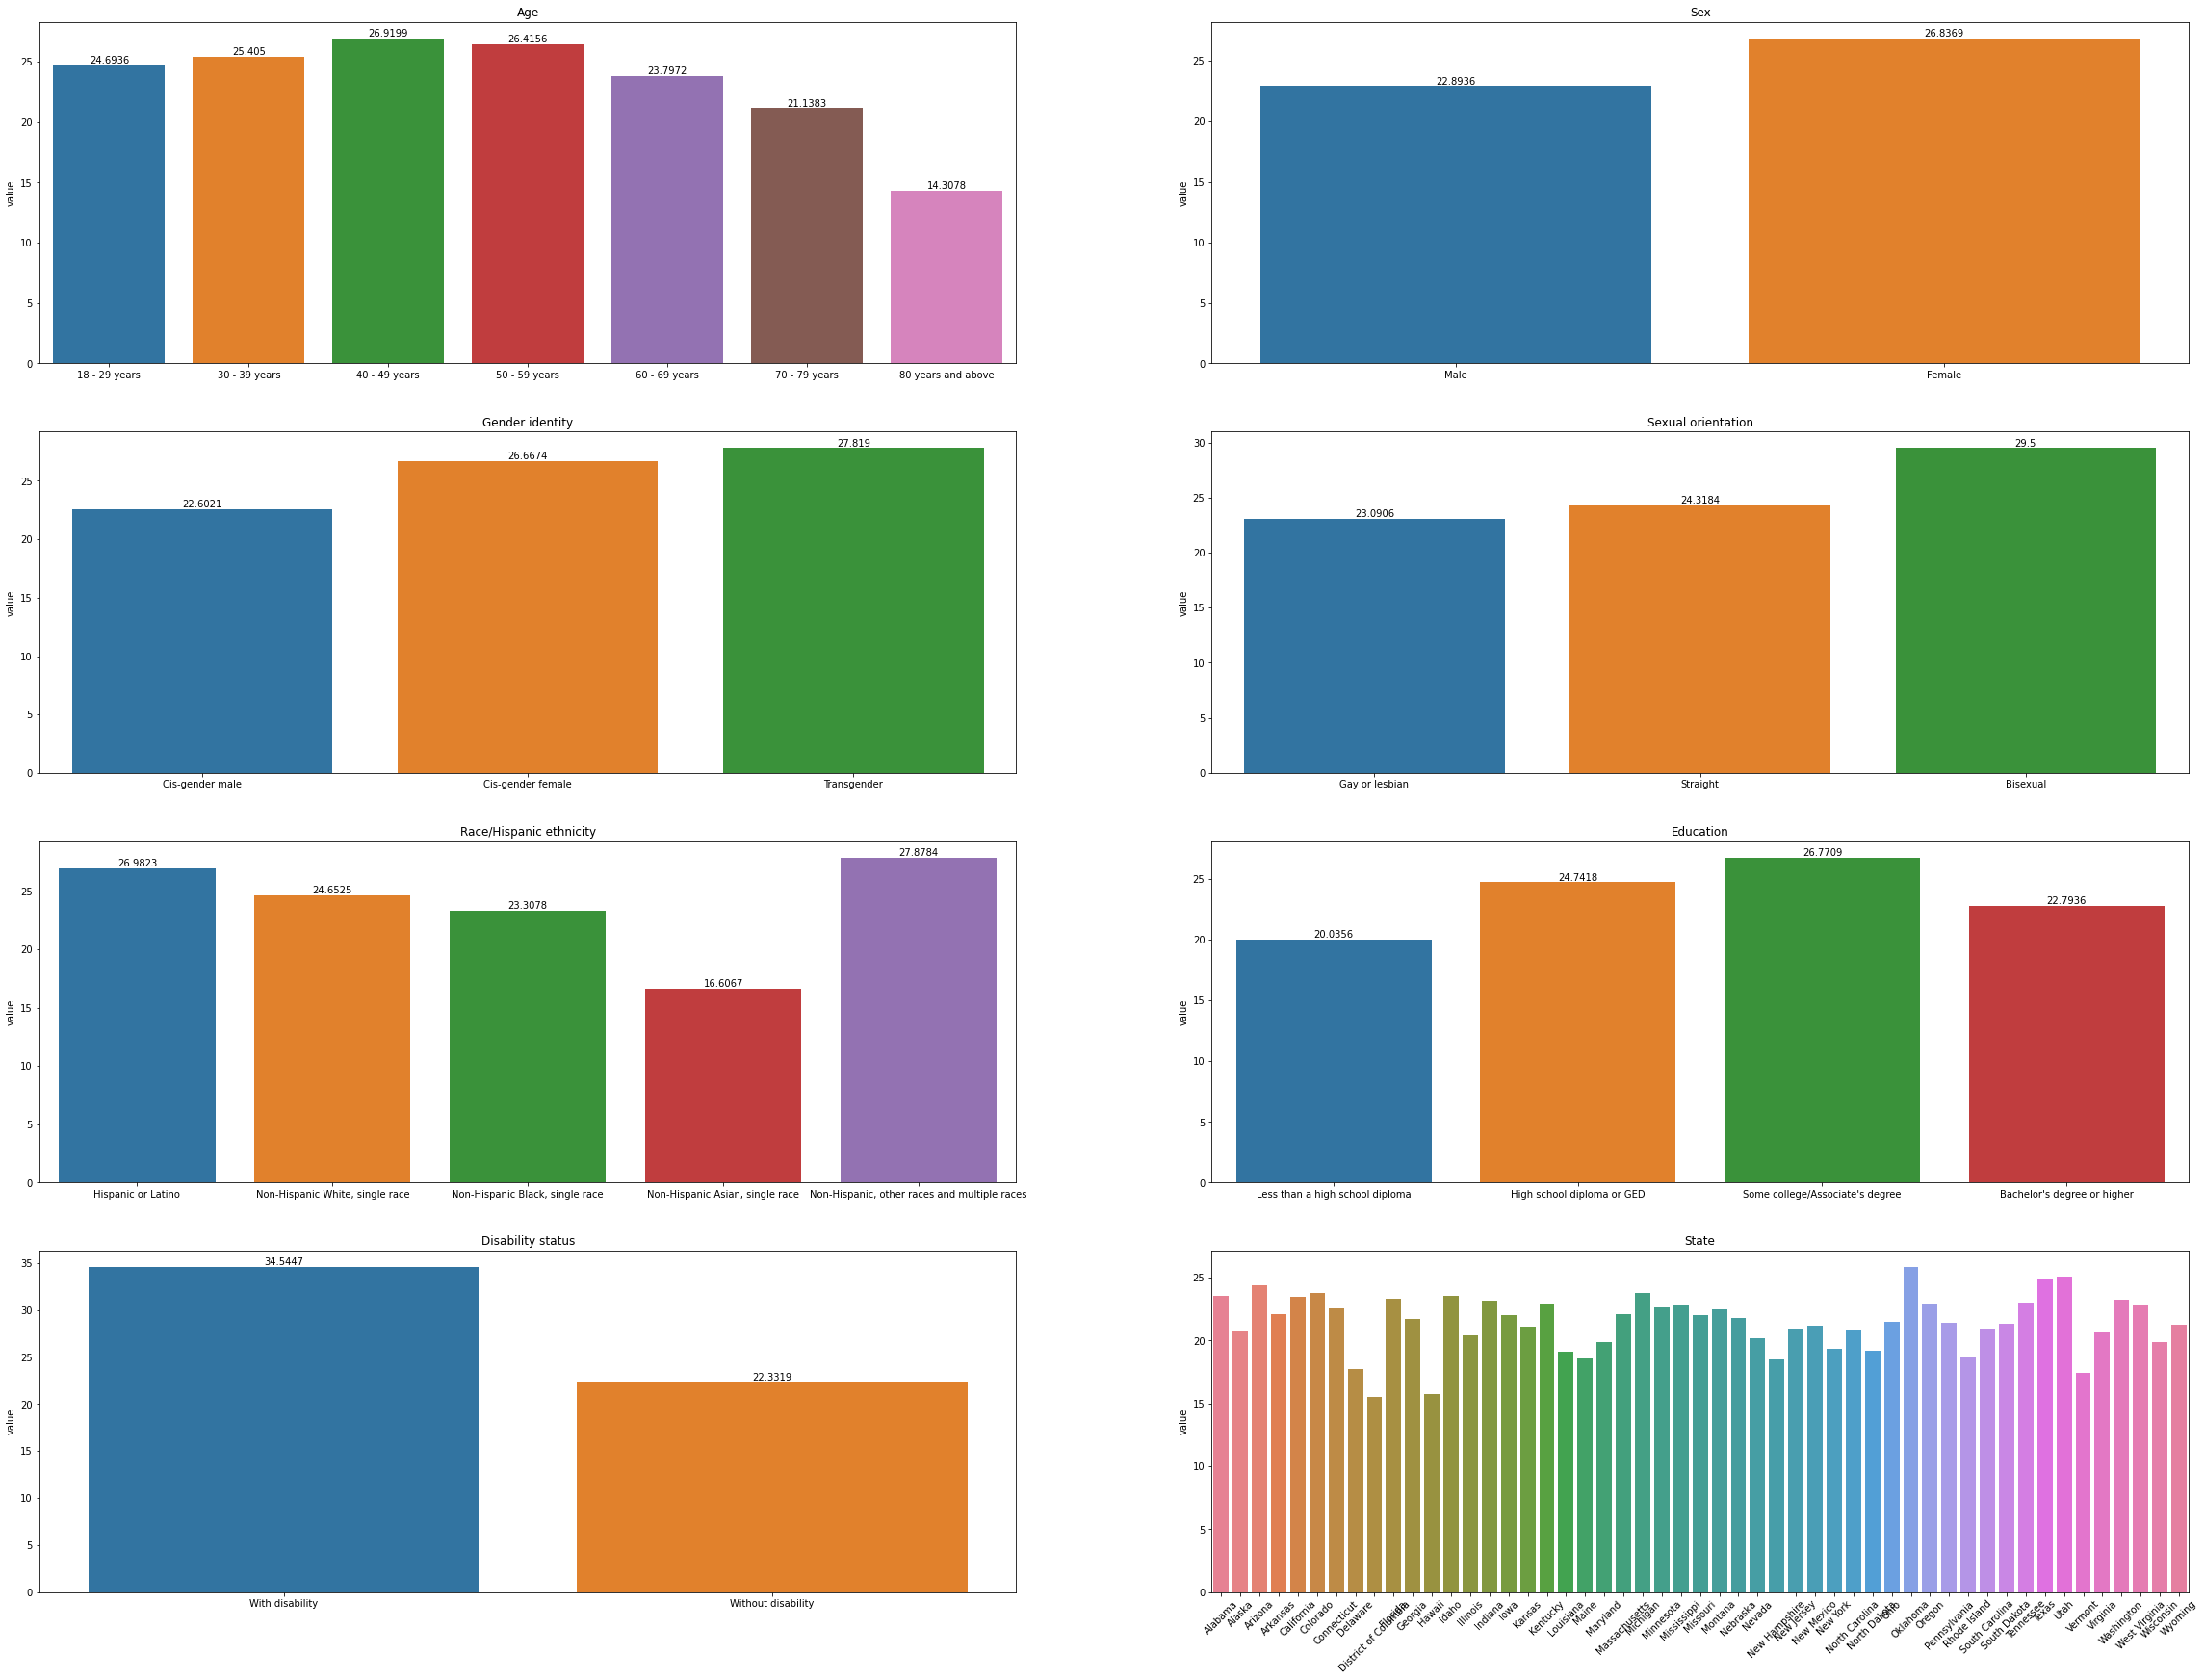

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30))

groups = cdc['group'].unique()
for i, ax in zip(range(1,9), axs.ravel()):
    if i == 8:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.barplot(analysis, x="subgroup", y="value", hue = "subgroup", ax = ax, errorbar=None)

        # chart formatting
        ax.set_title(groups[i])
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
    else:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.barplot(analysis, x="subgroup", y="value", hue = "subgroup", estimator = "mean", ax = ax, errorbar=None)
        for j in ax.containers:
            ax.bar_label(j,)

        # chart formatting
        ax.set_title(groups[i])
        ax.set_xlabel("")

plt.show()

Let's take a look at the data through each group and it's given sugroups. Primarily, ammongst all Long Covid patients surveyed through the CDC, we can see that the largest age group surveyed was those age 40-49. Additionally, more females responded to the survey than males. In terms of gender and sexuality, cis-gender females and transgender people had a higher experience with long Covid than cis-gender males and bisexual individuals had a greater percentage of long covid experiences. A few other things to note, those in the category "non-hsopanic, other races and multiple races" were highest amongst the ethnicity demographics and not suprisingly, the highest disparity amongst the subcategories was between those who were disabled verses not disabled. Those with a disability had a 12.2% increase in long covid experiences than those who do not have a disability. The is very important to understanding Long Covid, as it has been known to effect those with disabilities more than it say with non-immunocompromised people. 

Lastly, we'll take a look at the overall distributions for each key value in order to understand the survey in greater detail. 

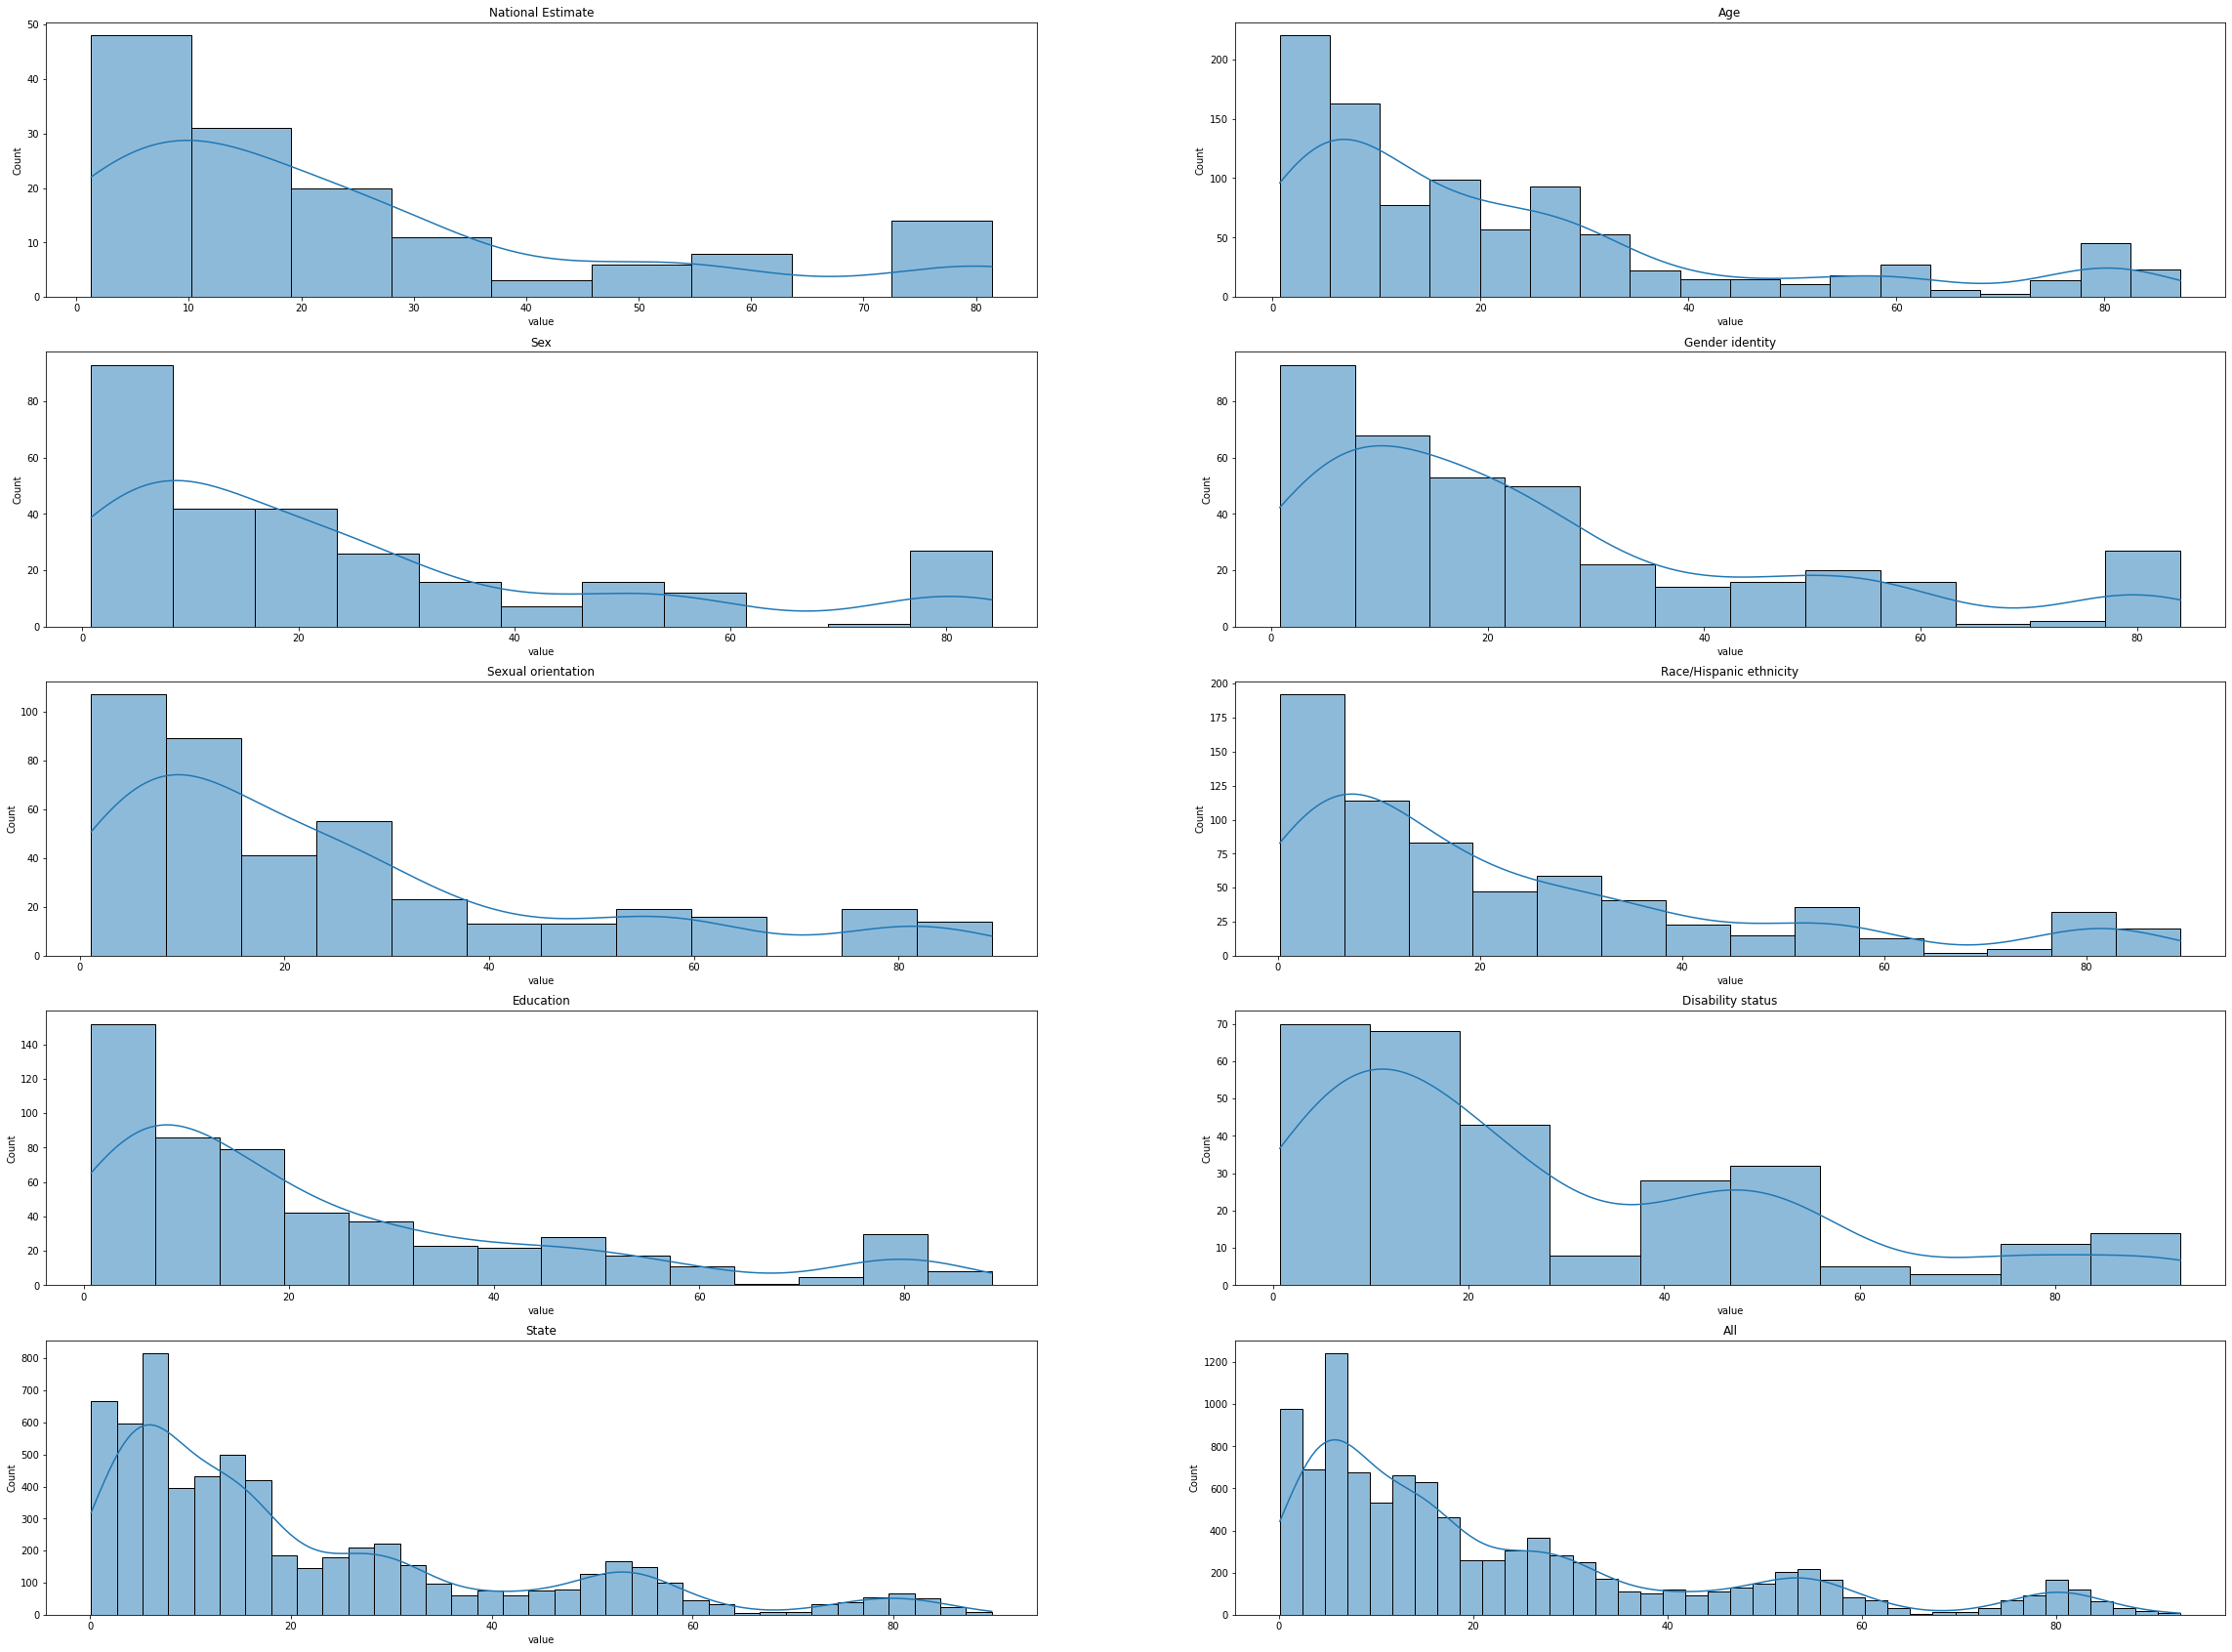

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(40, 30))

groups = cdc['group'].unique()
for i, ax in zip(range(10), axs.ravel()):
    if i == 9:
        sns.histplot(cdc, x="value", ax = ax, kde = True)
        # chart formatting
        ax.set_title('All')
        ax.set_xlabel("")
    else:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.histplot(analysis, x="value", ax = ax, kde = True)

        # chart formatting
        ax.set_title(groups[i])

plt.show()

For all subgroups and the dataset as a whole, we can see that the distributions are all rightly skewed. This indicates that most of the percentages collected all fell closer to zero. Since this dataset is heavily filled with categorical data, we will try to develop a way to pear down the features through naive bayes analysis and feature selection within the next section. 

### Long Covid Symptoms - UK

The following dataset was measured to UK survey and app data regarding symptoms tracked for patients with Long Covid. In order to undertsand the distribution of the data and track the symptoms over time, we can take a look at the following. 

In [64]:
uk_health = pd.read_csv("../../data/01-modified-data/long_covid_uk_health_clean.csv")
uk_health.drop('Unnamed: 0', axis = 1, inplace= True)
uk_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symptom                            272 non-null    object 
 1   domain                             272 non-null    object 
 2   group                              272 non-null    object 
 3   estimate                           264 non-null    float64
 4   lower_95_percent_confidence_limit  264 non-null    float64
 5   upper_95_percent_confidence_limit  264 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.9+ KB


In [65]:
uk_health.head()

,symptom,domain,group,estimate,lower_95_percent_confidence_limit,upper_95_percent_confidence_limit
0,Abdominal pain,All people,All people,9.56,8.82,10.30
1,Abdominal pain,Health/disability status,No health conditions,6.96,6.04,7.87
2,Abdominal pain,Health/disability status,Activity not limited by health conditions,6.06,4.26,7.85
3,Abdominal pain,Health/disability status,Activity limited a little by health conditions,11.30,9.70,12.91
4,Abdominal pain,Health/disability status,Activity limited a lot by health conditions,17.20,14.83,19.56


Some important features to look at in the data set are symptom, which are the symptoms people tracked in the survey, domain and group, which act similarly to the group and subgroup from the CDC data, and estimate, which is the corresponding percentage of the those who filled out the survey. If we to extrapolate from the survey data, we could also use the lower and upper confidence boundaries. 

In order to understand the dataset and the symptoms, lets take a look at the symptoms for all people that filled out the survey. 

---

In [60]:
import pandas as pd 
import numpy as np
import wordcloud 
import string 
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

news = pd.read_csv('../../data/00-raw-data/long_covid_news_raw.csv')
text = news['title'].tolist()
text.append(news['content'].tolist())
text = ' '.join([str(elem) for elem in text])

# #FILTER OUT UNWANTED CHARACTERS
new_text=""
for character in text:
    if character in string.printable:
        new_text+=character
text=new_text

# #FILTER OUT UNWANTED WORDS
new_text=""
for word in nltk.tokenize.word_tokenize(text):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";","[ removed ]"]:
            #remove the last space
            new_text=new_text[0:-1]+word+" "
        else: #add a space
            new_text+=word.lower()+" "
text=new_text

with open('../../data/01-modified-data/long_covid_news_clean.txt', 'w') as file:
    # Write the list as a string with elements separated by spaces and add a newline at the end
    file.write(''.join(map(str, text)) + '\n')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[ removed ] [ removed ] `` long colds '' may exist, researchers find studying long covid [ removed ] [ removed ] [ removed ] threads ban sensitive search terms temporary, instagram head says how to cure 'brain fog ' using these super easy expert tips [ removed ] care home boss shocked speed covid variant american long covid sufferers preyed unregulated stem cell clinics a new possible explanation long covid could lead simple treatment patients long covid research is in its most hopeful phase yet have cold cant seem shake? long covid thingand long cold may long-covid may long-term respiratory illness - study it 's long covid: symptoms linger illnesses, leading 'long colds ' long covid: can plant-based, anti-inflammatory diets help? long colds vs. long covid: the differences, similarities symptoms new research offers clues causes long covid fuelling hope eventual treatments [ removed ] brain fog long covid: low serotonin could play role [ removed ] what causes long covid? the answer migh

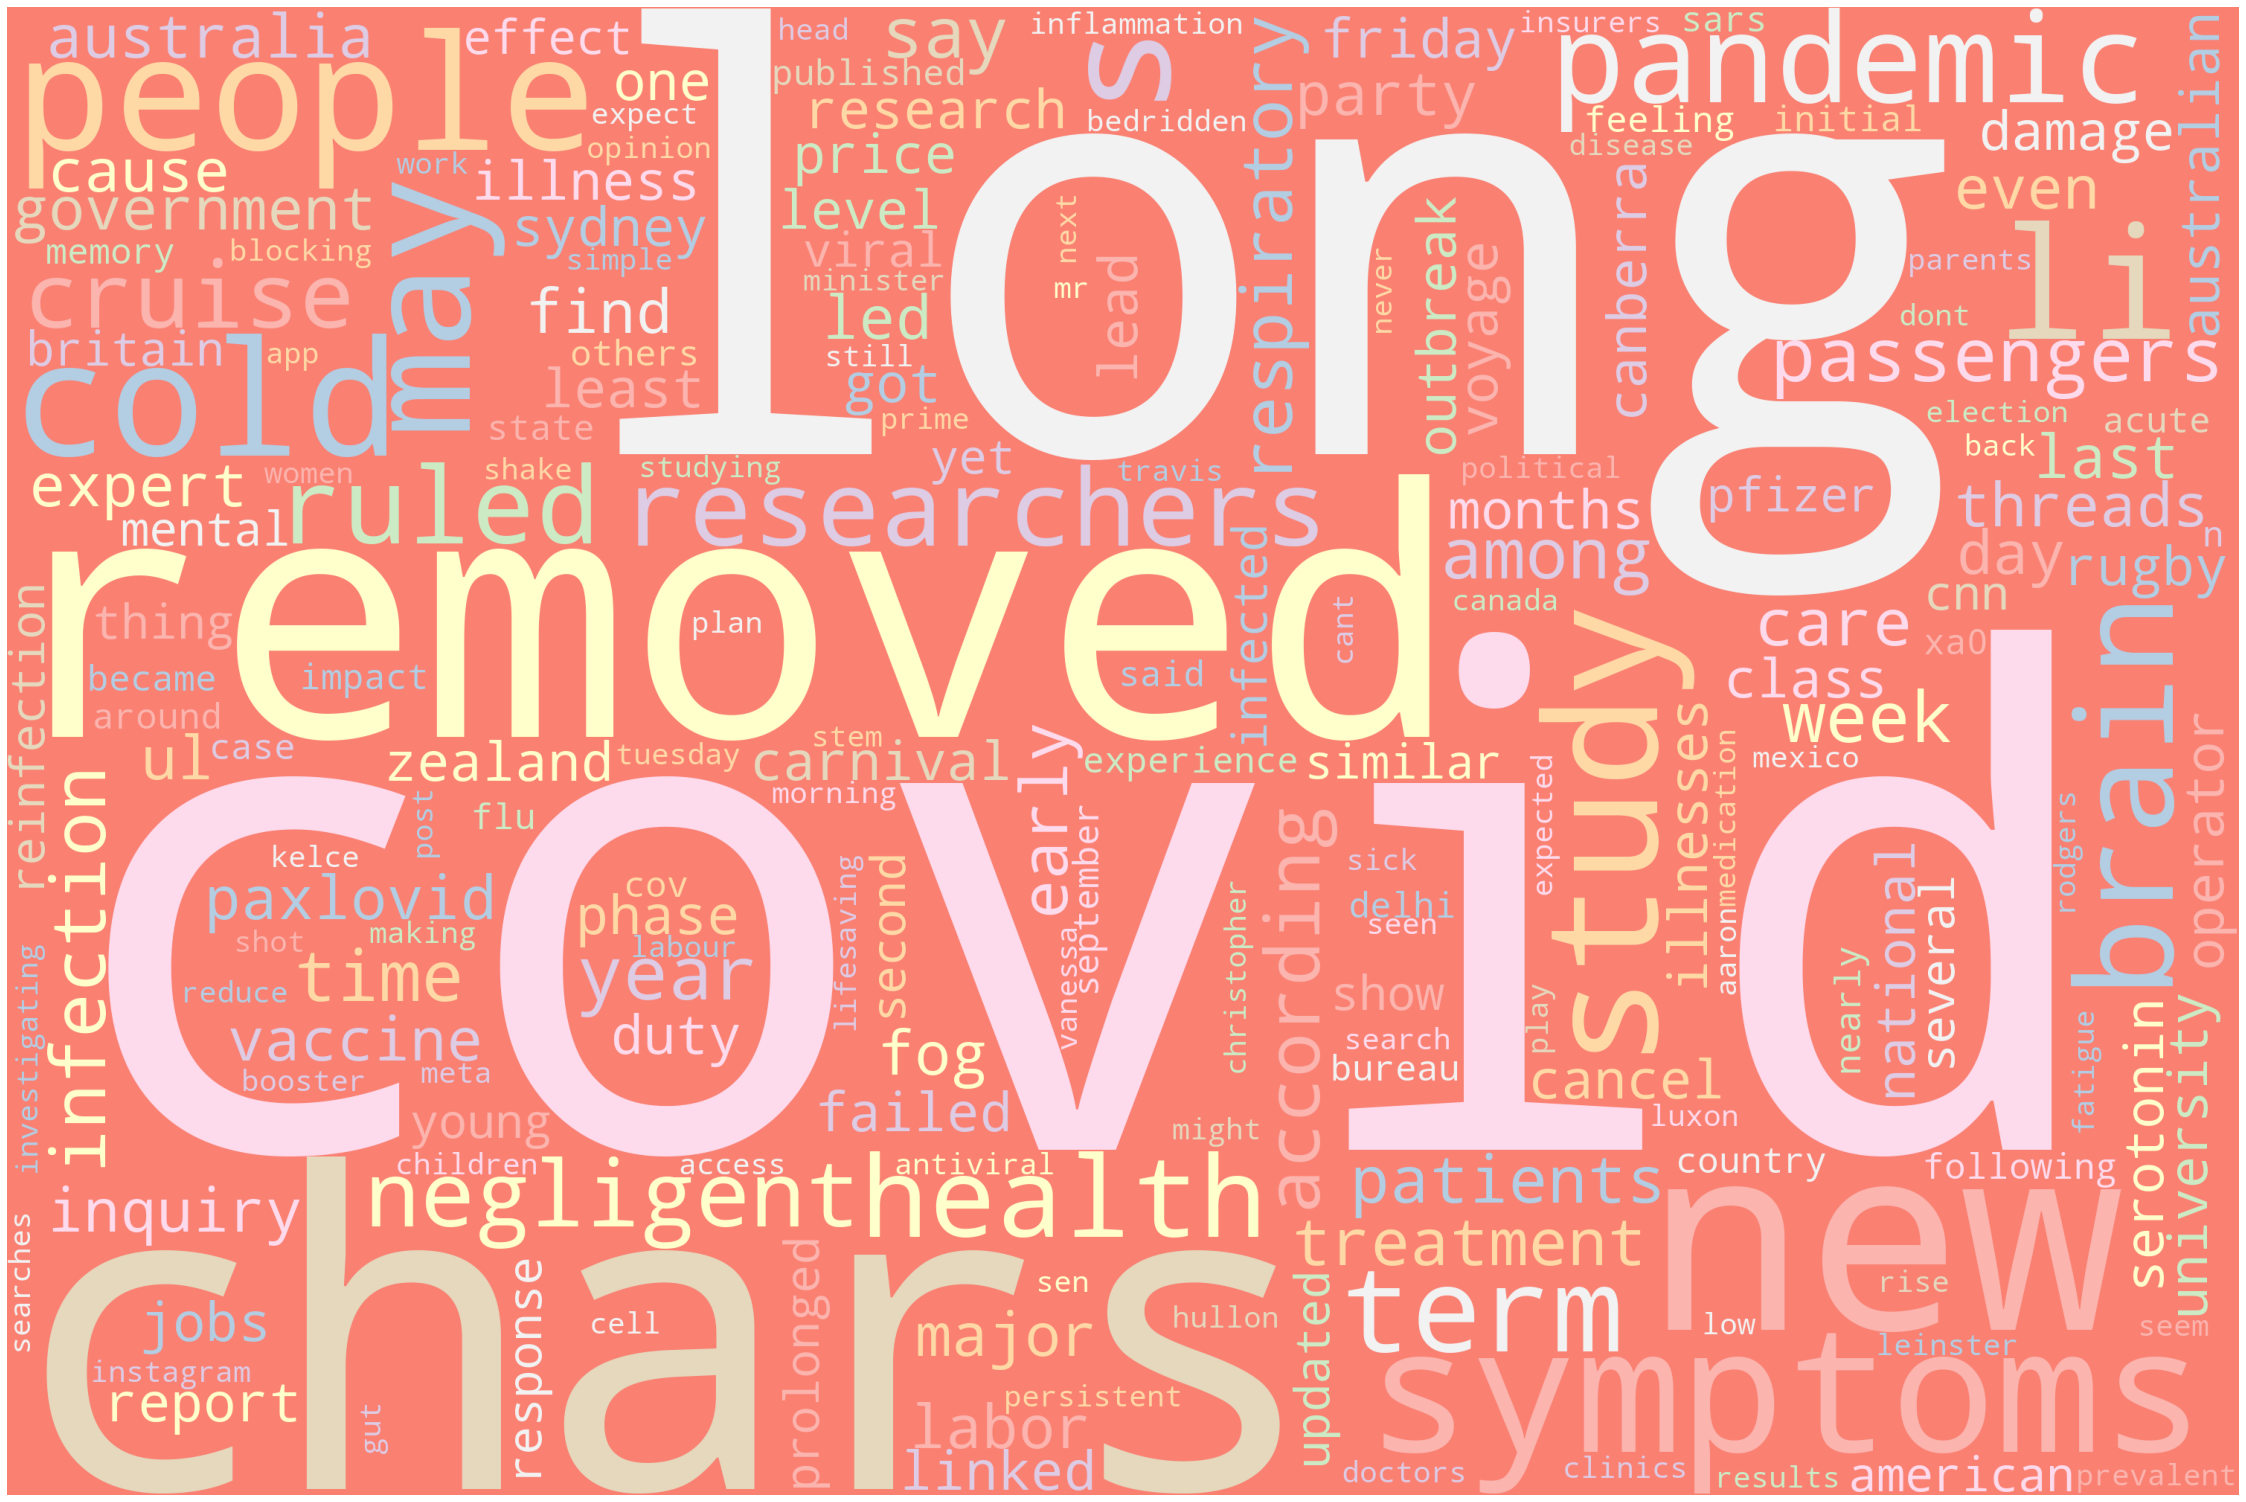

In [61]:
file = open("../../data/01-modified-data/long_covid_news_clean.txt", "r")
content = file.read()
print(content)
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

generate_word_cloud(content)